# ARSHIA J S

# Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"

# BEGINNER LEVEL TASK

# TASK-2 : Stock Market Prediction And Forecasting Using Stacked LSTM

# DatasetLink : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# 

Importing modules

In [1]:
import math
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
stock_data = pd.read_csv("NSE-TATAGLOBAL.csv")
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Checking the null value in dataset

In [4]:
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Plotting close price

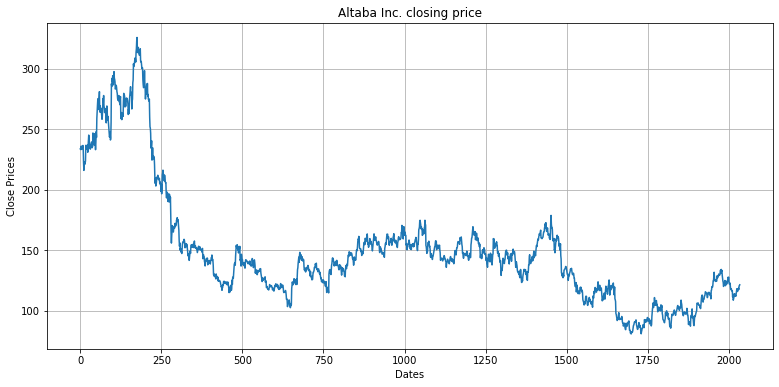

In [5]:
plt.figure(figsize=(13,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()  

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Feature Scaling

Splitting the data into train and test set

In [7]:
train_set = stock_data.iloc[:500, 1:2].values
test_set = stock_data.iloc[500:, 1:2].values

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set = sc.fit_transform(train_set)

Creating Data with Timesteps

In [9]:
X_train = []
y_train = []
for i in range(60, 500):
    X_train.append(train_set[i-60:i, 0])
    y_train.append(train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Building the LSTM

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 50))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
14/14 [==============================] - 27s 197ms/step - loss: 0.1927
Epoch 2/100
14/14 [==============================] - 3s 177ms/step - loss: 0.0752
Epoch 3/100
14/14 [==============================] - 2s 161ms/step - loss: 0.0350
Epoch 4/100
14/14 [==============================] - 2s 156ms/step - loss: 0.0255
Epoch 5/100
14/14 [==============================] - 3s 192ms/step - loss: 0.0204
Epoch 6/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0179
Epoch 7/100
14/14 [==============================] - 2s 169ms/step - loss: 0.0159
Epoch 8/100
14/14 [==============================] - 2s 166ms/step - loss: 0.0167
Epoch 9/100
14/14 [==============================] - 2s 163ms/step - loss: 0.0159
Epoch 10/100
14/14 [==============================] - 3s 183ms/step - loss: 0.0127
Epoch 11/100
14/14 [==============================] - 2s 176ms/step - loss: 0.0126
Epoch 12/100
14/14 [==============================] - 2s 162ms/step - loss: 0.0124
Epoch 13/100

Make Predictions using the test set

In [11]:
# Getting the predicted stock price of 2017
dataset_train = stock_data.iloc[:500, 1:2]
dataset_test = stock_data.iloc[500:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(459, 60, 1)


Visualizing the results

In [13]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 5s 43ms/step


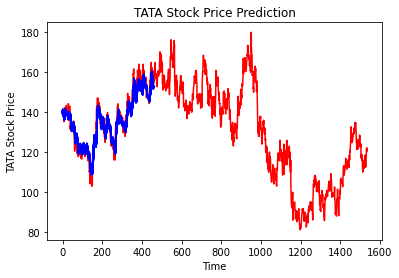

In [14]:
plt.plot(test_set, color = 'red', label = 'Test TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
#plt.legend()
plt.show()